1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

__Задача:__ предсказание баллов ЕГЭ ученика

In [13]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [14]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [15]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [67]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [103]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации

        W -= eta * (dQ + dReg)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

Iter: 0, weights: [ 1.14940681 -0.70771302 -0.44537956 -0.3453898 ], error 3402.8790323325857
Iter: 100, weights: [49.15942891  4.62588201  3.26731336  4.39792895], error 83.40732787804379
Iter: 200, weights: [55.52649672  5.20672005  2.53618879  4.65738489], error 27.331276233634355
Iter: 300, weights: [56.37089443  5.54946264  1.95765051  4.92283577], error 25.833058864139616
Iter: 400, weights: [56.48287808  5.76602227  1.50566945  5.17876624], error 25.496418972111865
Iter: 500, weights: [56.4977293   5.90792647  1.14810633  5.40926007], error 25.293432532646975
Iter: 600, weights: [56.49969886  6.00449376  0.86263509  5.60921834], error 25.161690253927
Iter: 700, weights: [56.49996006  6.07266781  0.63324064  5.77887671], error 25.07504891099968
Iter: 800, weights: [56.4999947   6.12242239  0.44807367  5.92085117], error 25.0177493992607
Iter: 900, weights: [56.4999993   6.15976982  0.29814033  6.03861176], error 24.97975729180399
Final MSE: 24.95453700631982
Iter: 0, weights: [0.

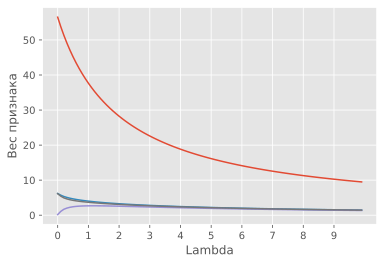

In [104]:
lambda_range = np.arange(0,10,0.1)
coeffs = np.zeros((lambda_range.shape[0], X_st.shape[1]))

for i, val in enumerate(lambda_range):
    grad = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=val)
    coeffs[i, :] = grad

for i in range(X_st.shape[1]):
    plt.plot(lambda_range, coeffs[:, i])

plt.title('')
plt.xticks(np.arange(0, 10))
plt.xlabel('Lambda')
plt.ylabel('Вес признака');

С ростом параметра лямбда веса стремятся к нулю. Для данного набор данных имеет смысл использовать коэффициент регуляризации 3-4.

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [97]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / abs(W) # градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [102]:
gradient_descent_reg_l1(X_st, y, iterations=1000, eta=1e-2, reg=1e-8)

Iter: 0, weights: [ 0.36743494 -0.31372036  0.3000922   0.75914144], error 3438.8326681667777
Iter: 100, weights: [49.05572415  4.45546192  3.21610407  4.62339692], error 85.05563734225792
Iter: 200, weights: [55.51274344  5.11717817  2.47504627  4.80528479], error 27.326550430078555
Iter: 300, weights: [56.36907047  5.50525215  1.8987499   5.02520032], error 25.79102209579125
Iter: 400, weights: [56.48263618  5.74587272  1.4526644   5.25217574], error 25.461853119530836
Iter: 500, weights: [56.49769721  5.90026937  1.10214414  5.46356372], error 25.268535635310805
Iter: 600, weights: [56.4996946   6.00309041  0.82364839  5.65042925], error 25.1445608685371
Iter: 700, weights: [56.49995949  6.07419381  0.60062129  5.81078431], error 25.063488236638882
Iter: 800, weights: [56.49999462  6.12513969  0.42102066  5.94593072], error 25.01001309025747
Iter: 900, weights: [56.49999928  6.1627979   0.27583223  6.05854232], error 24.974600011825455
Final MSE: 24.951104977980037


array([56.4999999 ,  6.19110925,  0.15920987,  6.15084347])

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

На практике рассмотрим 2 варианта:
а) нормализация, а затем стандартизация
б) стандартизация, а затем нормализация.
Результаты будем сравнивать с помощью модели градиентного спуска с L2 регуляризацией на стандартизованных данных.

In [106]:
gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=4)

Iter: 0, weights: [ 2.57862748  1.08744489  1.05630732 -0.48000509], error 3158.52774737842
Iter: 100, weights: [18.79993195  2.46563952  2.14061204  2.36560542], error 1474.6520059744198
Iter: 200, weights: [18.8332647   2.46368189  2.12991843  2.37874544], error 1471.9639092899413
Iter: 300, weights: [18.83333319  2.46367469  2.12976444  2.37890981], error 1471.9582308906834
Iter: 400, weights: [18.83333333  2.46367478  2.12976228  2.37891193], error 1471.958216801982
Iter: 500, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167383824
Iter: 600, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377666
Iter: 700, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377587
Iter: 800, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377587
Iter: 900, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377587
Final MSE: 1471.9582167377587


array([18.83333333,  2.46367479,  2.12976225,  2.37891196])

а) нормализация, а затем стандартизация

In [109]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [110]:
X_norm = X.copy().astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [111]:
X_norm_st = X_norm.copy()
X_norm_st[:, 1] = standard_scale(X_norm_st[:, 1])
X_norm_st[:, 2] = standard_scale(X_norm_st[:, 2])
X_norm_st[:, 3] = standard_scale(X_norm_st[:, 3])
X_norm_st

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

In [112]:
gradient_descent_reg_l2(X_norm_st, y, iterations=1000, eta=1e-2, reg=4)

Iter: 0, weights: [ 1.11173278 -0.15937003  0.31527344 -2.13242876], error 3424.8291369253393
Iter: 100, weights: [18.79691766  2.46430062  2.14744419  2.35966272], error 1474.9060273141088
Iter: 200, weights: [18.8332585   2.46366383  2.13001293  2.37866598], error 1471.9645403746833
Iter: 300, weights: [18.83333318  2.46367444  2.12976573  2.37890873], error 1471.95823375412
Iter: 400, weights: [18.83333333  2.46367478  2.1297623   2.37891191], error 1471.9582168292952
Iter: 500, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167387316
Iter: 600, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377712
Iter: 700, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377587
Iter: 800, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377587
Iter: 900, weights: [18.83333333  2.46367479  2.12976225  2.37891196], error 1471.9582167377587
Final MSE: 1471.9582167377587


array([18.83333333,  2.46367479,  2.12976225,  2.37891196])

В данном случае веса получились одинаковые, и соответственно смысла применять стандартизацию после нормализации нет.

б) стандартизация, а затем нормализация.

In [113]:
X_st_norm = X_st.copy()
X_st_norm[:, 1] = min_max_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = min_max_scale(X_st_norm[:, 2])
X_st_norm[:, 3] = min_max_scale(X_st_norm[:, 3])
X_st_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [114]:
gradient_descent_reg_l2(X_st_norm, y, iterations=1000, eta=1e-2, reg=4)

Iter: 0, weights: [ 0.45773304  1.64030446 -0.67771582  1.5705115 ], error 3378.978553003743
Iter: 100, weights: [16.70390443  5.82941195  6.38954218  6.87758458], error 1180.6479487636068
Iter: 200, weights: [16.72748495  5.81423635  6.40973422  6.86269505], error 1179.217128773458
Iter: 300, weights: [16.72760935  5.81394986  6.41002665  6.86241771], error 1179.2154803637661
Iter: 400, weights: [16.72761056  5.81394551  6.4100319   6.86241371], error 1179.2154754315293
Iter: 500, weights: [16.72761057  5.81394544  6.41003199  6.86241365], error 1179.215475407572
Iter: 600, weights: [16.72761057  5.81394544  6.41003199  6.86241365], error 1179.2154754076432
Iter: 700, weights: [16.72761057  5.81394544  6.41003199  6.86241365], error 1179.2154754076507
Iter: 800, weights: [16.72761057  5.81394544  6.41003199  6.86241365], error 1179.2154754076514
Iter: 900, weights: [16.72761057  5.81394544  6.41003199  6.86241365], error 1179.2154754076514
Final MSE: 1179.2154754076514


array([16.72761057,  5.81394544,  6.41003199,  6.86241365])

Интересно что в данном случае финальная MSE несколько меньше, а веса больше.

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

К сожалению, не было времени на это задание